# K-Means Clustering mit europäischen Reiseländern

Im ersten Schritt werden die benötigten Pakete importiert

In [28]:
import pandas as pd # Paket zum Import von CSV
import numpy as np # Paket für Datenmanipulation
import matplotlib.pyplot as plt # Paket zum Plotten 

In [29]:
from functools import reduce # Paket zum Kombinieren von Tabellen
from sklearn.cluster import KMeans # Paket zum Anwenden von KMeans

Daten zu Kriminalität, Vertrauensindikatoren, BIP und Umweltverschmutzung werden in Dataframes importiert 

In [30]:
df1=pd.read_csv("europe-datasets/crime_2016.csv")
df2=pd.read_csv("europe-datasets/pollution_2016.csv")
df3=pd.read_csv("europe-datasets/trust_in_legal_2013.csv")
df4=pd.read_csv("europe-datasets/trust_in_police_2013.csv")
df5=pd.read_csv("europe-datasets/trust_in_politics_2013.csv")
df6=pd.read_csv("europe-datasets/perceived_health_2016.csv")
## erweitern Sie das Skript mit midestens zwei weiteren Datenquellen wie Arbeitslosenzahlen oder Arbeitsplatzzufriedenheit
df7=pd.read_csv("europe-datasets/median_income_2016.csv")
df8=pd.read_csv("europe-datasets/work_hours_2016.csv")

Die verschiedenen Dataframes werden mit Hilfe des Ländernamens miteinander verbunden

In [31]:
data=reduce(lambda x,y: pd.merge(x,y, on='country', how='inner'), 
            [df1, df2, df3, df4, df5, df6, df7, df8])

x=data
x=x.drop('country',1) # die Spalte mit dem Ländernamen wird für den Algorithmus verworfen
x.head()

/var/folders/p0/zj7nyg753_xdmvx_vw6mbf4w0000gn/T/ipykernel_60502/2973922050.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=x.drop('country',1) # die Spalte mit dem Ländernamen wird für den Algorithmus verworfen


,prct_rpt_crime,prct_rpt_pollution,legal_trust_rating,police_trust_rating,political_trust_rating,prct_health_verygood,prct_health_good,prct_health_fair,prct_health_bad,prct_health_verybad,median_income,avg_hrs_worked
0,12.4,10.7,6.0,7.2,4.4,31.9,38.3,21.6,6.4,1.7,23071,36.5
1,13.4,13.2,5.0,6.1,4.6,29.8,43.9,17.0,7.2,2.0,21335,37.0
2,25.0,15.1,3.0,3.6,2.6,19.1,46.7,23.2,8.7,2.3,6742,40.8
3,10.9,8.9,7.0,7.4,6.6,33.2,44.5,17.8,3.8,0.7,27692,34.7
4,9.8,9.2,3.6,4.7,2.6,44.1,34.6,16.8,3.8,0.7,16173,39.2


Die Elbow Methode wird angewendet, um ein gutes k zu ermitteln

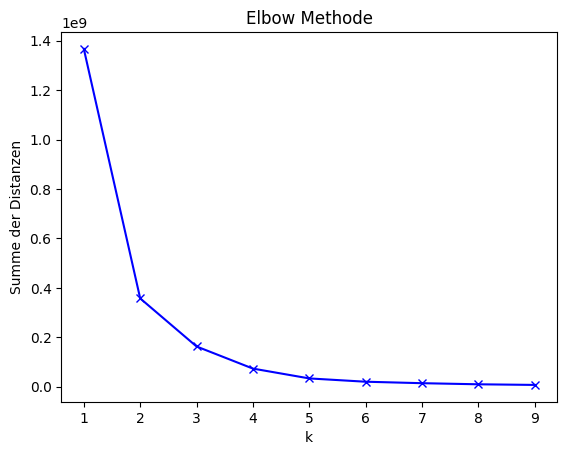

In [32]:
sum_of_sq_dist=[] 
K=range(1,10) 
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(x)
    sum_of_sq_dist.append(km.inertia_)

plt.plot(K,sum_of_sq_dist,'bx-')
plt.xlabel('k')
plt.ylabel('Summe der Distanzen')
plt.title('Elbow Methode')
plt.show()

Der k-Means wird hier mit dem Wert k=3 durchgeführt, ggf anpassen

## Hinweis:

- Das Ergebnis ist das finale Zentrum
- In Cluster 0 ist der Mittelwert der Crime Rate = 9.23
- Zu den 3 Clustern haben wir pro Kategorie eine Koordinate

In [33]:
kmeans=KMeans(n_clusters=3)
kmeans=kmeans.fit(x)

col=list(x.columns.values) 
count=data.iloc[:,0] 

ctr=kmeans.cluster_centers_
count_label=kmeans.labels_+1 

# Die verschiedenen Cluster werden mit ihren Zentren beschrieben
ctr=pd.DataFrame(ctr,columns=col)
ctr.insert(0,"cluster",[1,2,3]) 
(ctr.T).round(2)

,0,1,2
cluster,1.00,2.00,3.00
prct_rpt_crime,9.92,11.36,9.23
prct_rpt_pollution,14.12,12.29,10.60
legal_trust_rating,4.29,5.16,6.50
police_trust_rating,5.43,6.49,7.00
political_trust_rating,3.58,4.04,5.83
prct_health_verygood,17.45,26.46,28.47
prct_health_good,42.14,45.74,46.23
prct_health_fair,27.34,20.96,18.03
prct_health_bad,10.53,5.49,6.00


Die Länder werden den Clustern zu geordnet 

In [34]:
ctry_sum={'country': count,
          'cluster': count_label} 
ctry_sum=pd.DataFrame(ctry_sum,columns=['country','cluster'])
ctry_sum

,country,cluster
0,Austria,2
1,Belgium,2
2,Bulgaria,1
3,Switzerland,3
4,Cyprus,2
5,Czechia,1
6,Germany,2
7,Denmark,2
8,Estonia,1
9,Greece,1


Plotten von Indikatoren der Kriminalitätsrate und des Gesundheitsindikators

In [35]:
result = pd.concat([ctry_sum.reset_index(drop=True), x], axis=1) # original data and cluster results
cluster_1=result[result.cluster==1]
#plt.scatter(cluster_1.iloc[:,2],cluster_1.iloc[:,7],c="green",label="Cluster 1")
cluster_1.iloc[:,13]

2     40.8
5     40.3
8     38.4
9     42.3
13    39.4
14    39.7
18    38.5
20    38.7
24    40.7
25    39.4
26    39.9
29    40.1
30    46.8
Name: avg_hrs_worked, dtype: float64

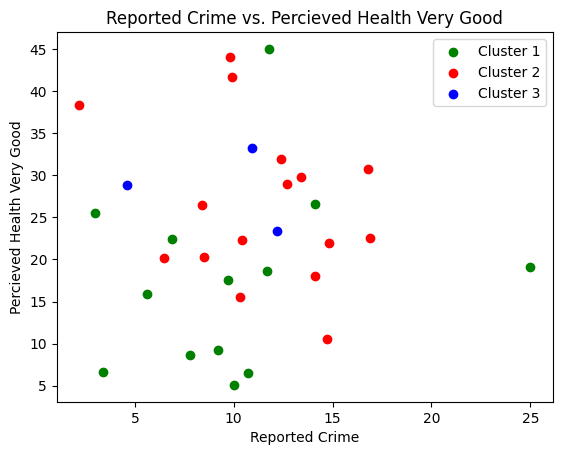

In [36]:
result = pd.concat([ctry_sum.reset_index(drop=True), x], axis=1) # original data and cluster results
cluster_1=result[result.cluster==1]
cluster_2=result[result.cluster==2]
cluster_3=result[result.cluster==3]
plt.scatter(cluster_1.iloc[:,2],cluster_1.iloc[:,7],c="green",label="Cluster 1")
plt.scatter(cluster_2.iloc[:,2],cluster_2.iloc[:,7],c="red",label="Cluster 2")
plt.scatter(cluster_3.iloc[:,2],cluster_3.iloc[:,7],c="blue",label="Cluster 3")
plt.xlabel('Reported Crime')
plt.ylabel('Percieved Health Very Good')
plt.title('Reported Crime vs. Percieved Health Very Good')
plt.legend()
plt.show()
# erweitern Sie das Skript, sodass Sie jeweils ein anderes Features mit dem Feature medium_income vergleichen
# Was fällt auf? Wie könnte man der Abhängigkeit mit einer Datentransformation begegnen?

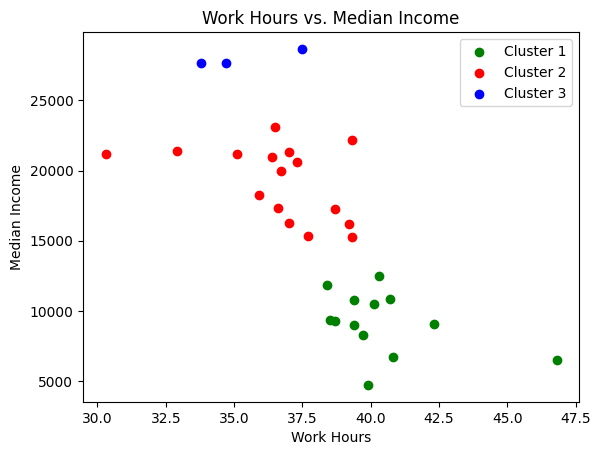

In [37]:
result = pd.concat([ctry_sum.reset_index(drop=True), x], axis=1) # original data and cluster results
cluster_1=result[result.cluster==1]
cluster_2=result[result.cluster==2]
cluster_3=result[result.cluster==3]
plt.scatter(cluster_1.iloc[:,13],cluster_1.iloc[:,12],c="green",label="Cluster 1")
plt.scatter(cluster_2.iloc[:,13],cluster_2.iloc[:,12],c="red",label="Cluster 2")
plt.scatter(cluster_3.iloc[:,13],cluster_3.iloc[:,12],c="blue",label="Cluster 3")
plt.xlabel('Work Hours')
plt.ylabel('Median Income')
plt.title('Work Hours vs. Median Income')
plt.legend()
plt.show()

## Hinweis
- Hohe Trennung nach Income auf der Y-Achse
- Im Clustering berechne ich Abstände, dann ist ein Abstand zwischen 20k und 25k dominanter als ein Abstand zwischen 40 und 42.5
- Man müsste bzw. sollte hier vorher normalisieren, damit man diesen Seiteneffekt vermeidet
- KL: Was fällt auf, Wo muss ich Code anpassen wenn ich was bestimmtes erreichen möchte, Screenshot von dem Cluster ohne Normalisierung und dann sagen müssen was man da machen müsste um auf ein besseres Ergebnis zu kommen